### 데이터 수집

- 대중교통통계자료(https://www.t-money.co.kr/ncs/pct/ugd/ReadTrcrStstList.dev)
- 2022년 6월 자료

In [1]:
import seaborn as sns
sns.set(font_scale=1)

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('seaborn')

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

In [8]:
# sheet_name = 2
df = pd.read_excel('../../data/dataset/2022년 06월  교통카드 통계자료.xls',sheet_name=2, usecols='B,D:H', thousands=',')
df.head(2)

,호선명,지하철역,유임승차,유임하차,무임승차,무임하차
0,1호선,서울역,1150754,1123193,194717,187155
1,1호선,시청,537067,543569,80671,78279


In [9]:
df.shape

(615, 6)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615 entries, 0 to 614
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   호선명     615 non-null    object
 1   지하철역    615 non-null    object
 2   유임승차    615 non-null    int64 
 3   유임하차    615 non-null    int64 
 4   무임승차    615 non-null    int64 
 5   무임하차    615 non-null    int64 
dtypes: int64(4), object(2)
memory usage: 29.0+ KB


## EDA

#### 1) 유임승차 비율이 높은 역

- 유임승차비율1 = 유임승차인원 / 무임승차인원

In [53]:
df['유임승차비율1'] = round(df['유임승차'] / df['무임승차'],1)

In [54]:
df.sort_values('유임승차비율1').tail()

,호선명,지하철역,유임승차,유임하차,무임승차,무임하차,유임승차비율1,유임승차비율2
474,6호선,신내,4,0,0,0,inf,100.0
266,일산선,지축,10,0,0,0,inf,100.0
440,6호선,연신내,31,0,0,0,inf,100.0
330,경의선,계양,10,0,0,0,inf,100.0
519,7호선,상동,1,0,0,0,inf,100.0


#### - 0으로 나뉜 값들이 존재하면서 inf값으로 나와 있음

In [55]:
condition = (df['유임승차비율1'] != np.inf) & (df['유임승차비율1'] > 0) & (df['유임승차'] > 10000)

#### 유임승차비율 순으로 정렬 - 호선명, 지하철역, 유임승차비율1 추출

In [56]:
df.loc[condition,['호선명','지하철역','유임승차비율1']].sort_values('유임승차비율1',ascending=False).head(10)

,호선명,지하철역,유임승차비율1
18,2호선,한양대,21.6
566,공항철도 1호선,홍대입구,17.9
48,2호선,홍대입구,17.7
120,경부선,서울역,15.8
568,공항철도 1호선,마곡나루(서울식물원),15.7
563,9호선,신논현,15.2
553,9호선,여의도,15.0
457,6호선,한강진,14.9
567,공항철도 1호선,디지털미디어시티,14.1
572,공항철도 1호선,청라국제도시,14.0


#### 2) 유임승차비율이 높은 역

- 유임승차비율2 = 유임승차인원 / (무임승차인원 + 유임승차인원)

In [57]:
df['유임승차비율2'] = round(df['유임승차'] / (df['무임승차'] + df['유임승차']) * 100,1)

In [58]:
df.head(3)

,호선명,지하철역,유임승차,유임하차,무임승차,무임하차,유임승차비율1,유임승차비율2
0,1호선,서울역,1150754,1123193,194717,187155,5.9,85.5
1,1호선,시청,537067,543569,80671,78279,6.7,86.9
2,1호선,종각,834173,815704,131987,121717,6.3,86.3


In [59]:
df.sort_values('유임승차비율2',ascending=False)

,호선명,지하철역,유임승차,유임하차,무임승차,무임하차,유임승차비율1,유임승차비율2
517,7호선,까치울,1,0,0,0,inf,100.0
330,경의선,계양,10,0,0,0,inf,100.0
266,일산선,지축,10,0,0,0,inf,100.0
440,6호선,연신내,31,0,0,0,inf,100.0
474,6호선,신내,4,0,0,0,inf,100.0
...,...,...,...,...,...,...,...,...
9,1호선,동묘앞,122460,131299,146455,147539,0.8,45.5
7,1호선,제기동,218782,209109,263173,281985,0.8,45.4
296,중앙선,지평,952,1282,1216,1173,0.8,43.9
208,경원선,소요산,32659,25998,62990,56806,0.5,34.1


In [60]:
condition1 = (df['유임승차비율2'] != np.inf) & (df['유임승차비율2'] > 0) & (df['유임승차'] > 10000)

In [61]:
df.loc[condition1,['호선명','지하철역','유임승차비율2']].sort_values('유임승차비율2',ascending=False).head(5)

,호선명,지하철역,유임승차비율2
18,2호선,한양대,95.6
566,공항철도 1호선,홍대입구,94.7
48,2호선,홍대입구,94.7
568,공항철도 1호선,마곡나루(서울식물원),94.0
120,경부선,서울역,94.0


#### 유무임 승하차 인원이 가장 많은 역?

In [62]:
df.sort_values('유임승차',ascending=False).head(1)

,호선명,지하철역,유임승차,유임하차,무임승차,무임하차,유임승차비율1,유임승차비율2
31,2호선,강남,2055521,2039847,154473,136085,13.3,93.0


In [63]:
df.sort_values('유임하차',ascending=False).head(1)

,호선명,지하철역,유임승차,유임하차,무임승차,무임하차,유임승차비율1,유임승차비율2
31,2호선,강남,2055521,2039847,154473,136085,13.3,93.0


In [64]:
df.sort_values('무임승차',ascending=False).head(1)

,호선명,지하철역,유임승차,유임하차,무임승차,무임하차,유임승차비율1,유임승차비율2
3,1호선,종로3가,450317,404106,299617,278151,1.5,60.0


In [65]:
df.sort_values('무임하차',ascending=False).head(1)

,호선명,지하철역,유임승차,유임하차,무임승차,무임하차,유임승차비율1,유임승차비율2
7,1호선,제기동,218782,209109,263173,281985,0.8,45.4


### 시각화

#### 유임승차 인원이 1,000,000 이상인 역 추출후 승하차 비율

- 유임승차 > 1000000, '지하철역','유임승차','유임하차','무임승차','무임하차' 컬럼만 추출 후 df2 저장

In [72]:
condition3 = df['유임승차'] > 1000000

In [77]:
df2 = df.loc[condition3,['지하철역','유임승차','유임하차','무임승차','무임하차']]
df2.head(2)

,지하철역,유임승차,유임하차,무임승차,무임하차
0,서울역,1150754,1123193,194717,187155
25,잠실(송파구청),1862829,1830324,193944,183893


#### 인덱스 재생성

#### [방법]1

In [85]:
df2.index

RangeIndex(start=0, stop=14, step=1)

In [84]:
df2.reset_index(inplace=True)
df2.head(3)

,index,지하철역,유임승차,유임하차,무임승차,무임하차
0,0,서울역,1150754,1123193,194717,187155
1,1,잠실(송파구청),1862829,1830324,193944,183893
2,2,삼성(무역센터),1336734,1358393,112903,105588


In [81]:
df2.drop(columns=['index'],inplace=True)

In [83]:
df2.head(3)

,지하철역,유임승차,유임하차,무임승차,무임하차
0,서울역,1150754,1123193,194717,187155
1,잠실(송파구청),1862829,1830324,193944,183893
2,삼성(무역센터),1336734,1358393,112903,105588


#### [방법2]

In [ ]:
df2.index = nparange(10)

In [ ]:
df2.index = np.arange(len(df2))

#### 원차트 작성
- 데이터프레임을 차트 그리기 좋은 형태로 변경

In [88]:
chart_pivot = pd.pivot_table(df2, index='지하철역', values=['유임승차','유임하차','무임승차','무임하차']).T
chart_pivot

지하철역,가산디지털단지,강남,고속터미널,구로디지털단지,삼성(무역센터),서울대입구(관악구청),서울역,선릉,신도림,신림,역삼,용산,잠실(송파구청),홍대입구
무임승차,83005,154473,186879,163090,112903,173256,194717,201887,195346,205673,147014,129074,193944,92453
무임하차,78395,136085,179024,164424,105588,165685,187155,177819,185455,205118,150062,127975,183893,89416
유임승차,1009940,2055521,1179733,1410353,1336734,1135276,1150754,1245231,1172265,1465285,1160459,1023817,1862829,1638384
유임하차,1007531,2039847,1153461,1402401,1358393,1113916,1123193,1103735,1189184,1400575,1322033,1042657,1830324,1774322


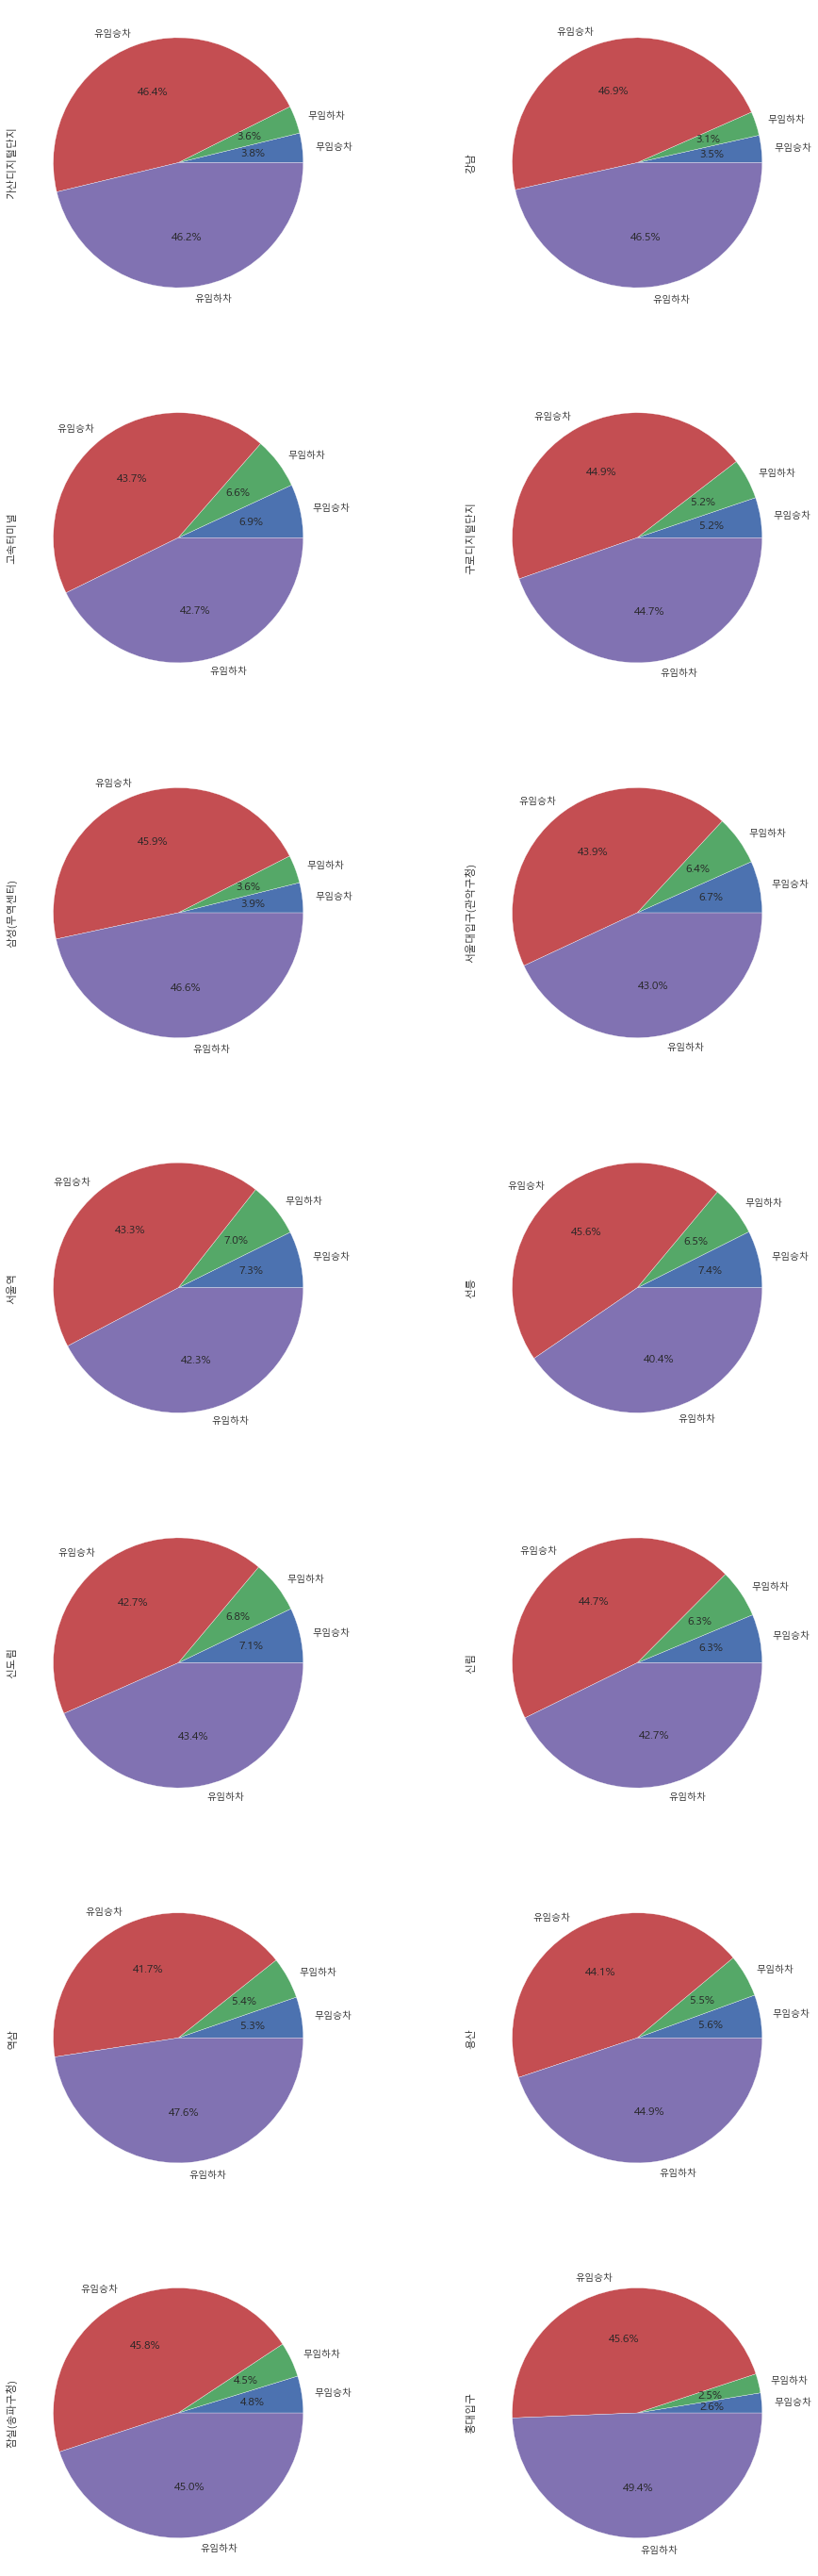

In [90]:
chart_pivot.plot.pie(subplots=True, layout=(7,2), figsize=(16,50), legend=False, autopct = '%.1f%%');

### 위 차트를 역별로 파일 저장

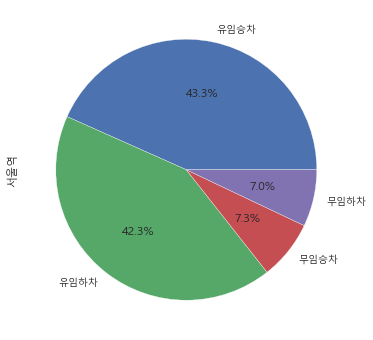

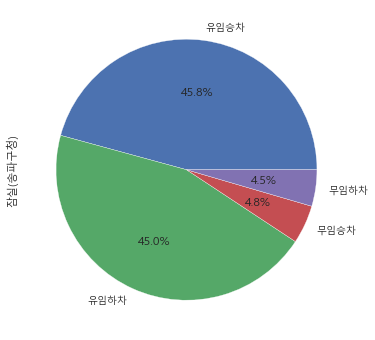

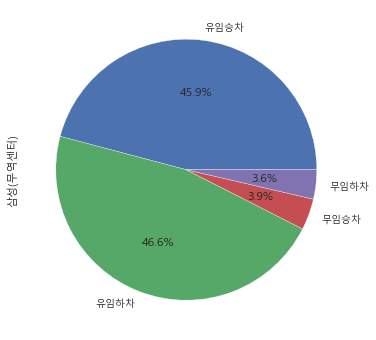

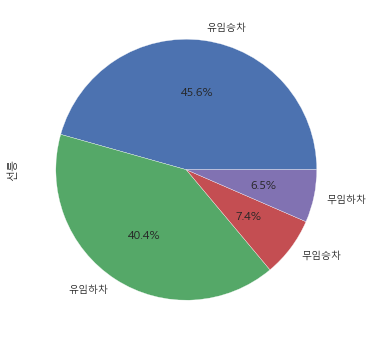

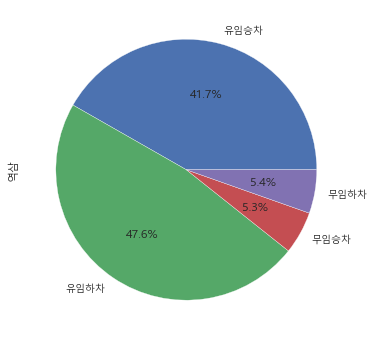

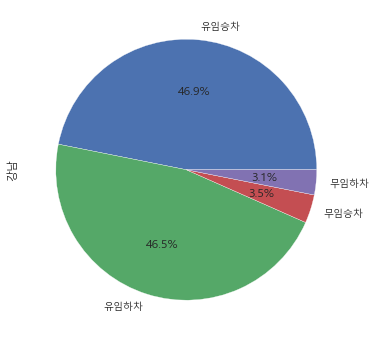

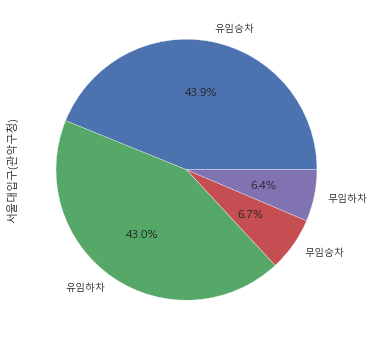

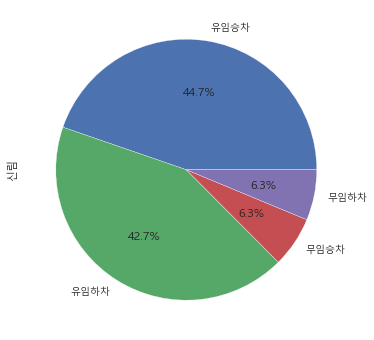

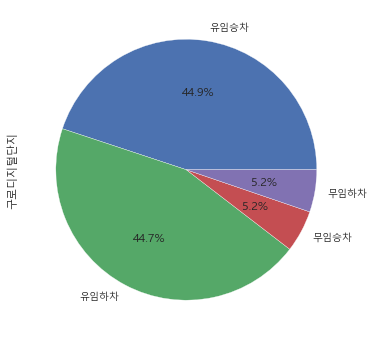

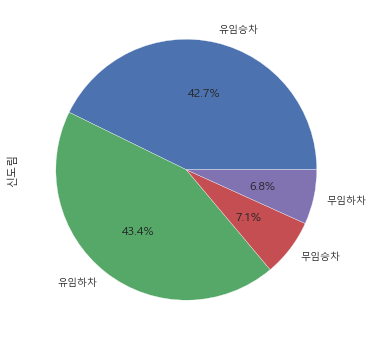

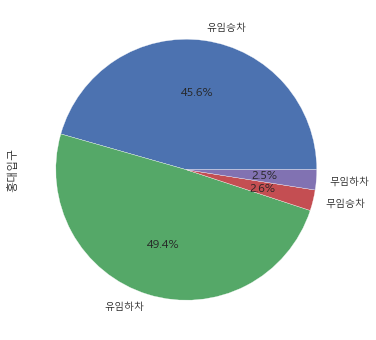

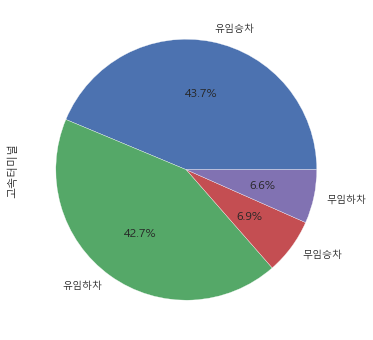

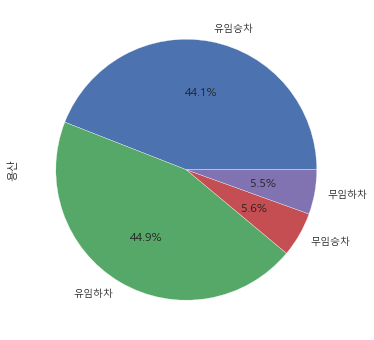

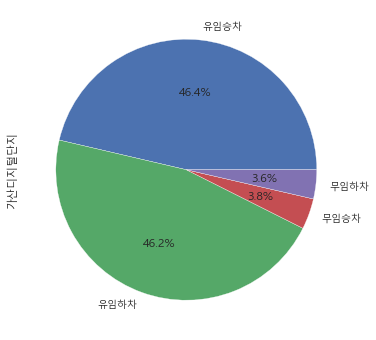

In [99]:
for idx in range(len(df2)):
    df2.loc[idx,['유임승차','유임하차','무임승차','무임하차']].plot.pie(autopct='%.1f%%',label=df2.loc[idx,'지하철역'],
                figsize=(6,6)) 
    plt.savefig(df2.loc[idx,'지하철역']+'.png')
    plt.show()

In [94]:
df2.head()

,지하철역,유임승차,유임하차,무임승차,무임하차
0,서울역,1150754,1123193,194717,187155
1,잠실(송파구청),1862829,1830324,193944,183893
2,삼성(무역센터),1336734,1358393,112903,105588
3,선릉,1245231,1103735,201887,177819
4,역삼,1160459,1322033,147014,150062
